### Importing The Libraries

In [39]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

### Loading The Dataset

In [40]:
paths = []
labels= []

for dir_name, _, file_names in os.walk("Input"):
    for filename in file_names:
        paths.append(os.path.join(dir_name, filename))
        #print(filename)
        label = filename.split('_')[-1]  # splitting based on the '_' and going to get the last part(-1)
        label = label.split('.')[0]  # splitting based on '.' and going to get the first 1
        labels.append(label.lower()) # converting the labels into lowercase
    if len(paths) == 2800:
        break
print('Dataset is Loaded')    

Dataset is Loaded


In [41]:
len(paths)

2800

In [42]:
paths[:5]

['Input\\OAF_back_angry.wav',
 'Input\\OAF_back_disgust.wav',
 'Input\\OAF_back_fear.wav',
 'Input\\OAF_back_happy.wav',
 'Input\\OAF_back_neutral.wav']

In [43]:
labels[:5]

['angry', 'disgust', 'fear', 'happy', 'neutral']

In [44]:
## Create a dataframe
data = pd.DataFrame()
data['speech'] = paths
data['label'] = labels
data.head()

,speech,label
0,Input\OAF_back_angry.wav,angry
1,Input\OAF_back_disgust.wav,disgust
2,Input\OAF_back_fear.wav,fear
3,Input\OAF_back_happy.wav,happy
4,Input\OAF_back_neutral.wav,neutral


In [45]:
data['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

### The EDA Part

<AxesSubplot:xlabel='label', ylabel='count'>

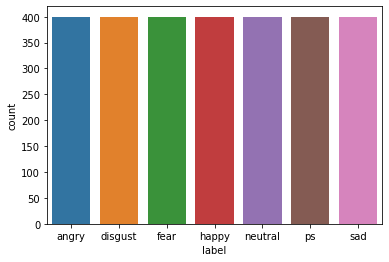

In [46]:
sns.countplot(data['label'])

Now I am going to display the wavefrom of the audio file

In [47]:
## displaying the spectogram and waveplot

def waveplot(datas, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=22)
    librosa.display.waveshow(datas, sr = sr)
    plt.show()
    
    
def spectogram(datas, sr, emotion):
    x = librosa.stft(datas)
    xdb = librosa.amplitude_to_db(abs(x))  ## converting to desibels
    plt.figure(figsize=(12, 4))
    plt.title(emotion, size=22)
    librosa.display.specshow(xdb, sr = sr, x_axis="time", y_axis="hz")
    plt.colorbar()    

### displaying those plots for diff emotions

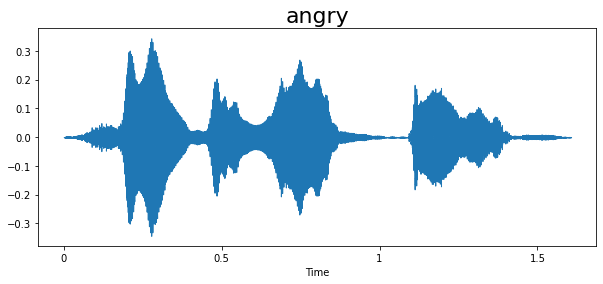

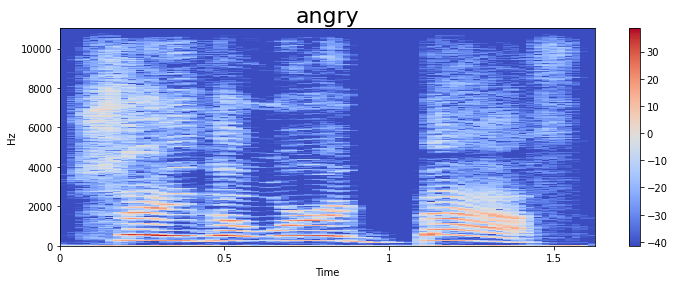

In [48]:
emotion = "angry"
path = np.array(data['speech'][data['label']==emotion])[3]
# print(path)
datas, sampling_rate = librosa.load(path)
waveplot(datas, sampling_rate, emotion)
spectogram(datas, sampling_rate, emotion)
Audio(path)

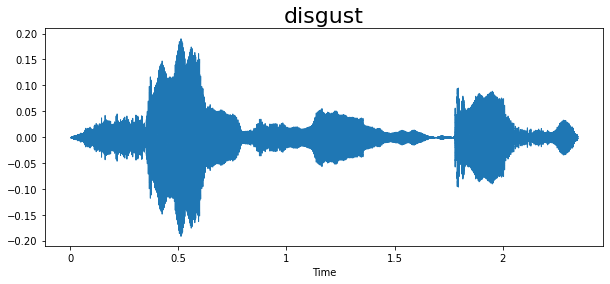

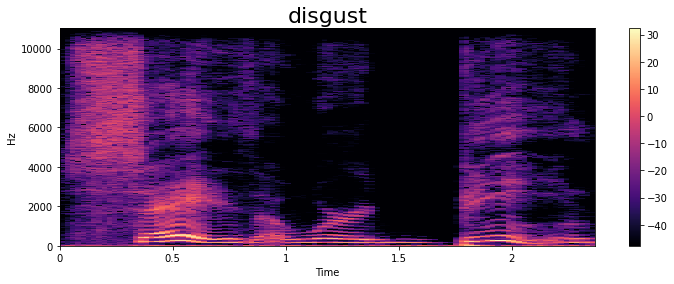

In [49]:
emotion = "disgust"
path = np.array(data['speech'][data['label']==emotion])[4]
# print(path)
datas, sampling_rate = librosa.load(path)
waveplot(datas, sampling_rate, emotion)
spectogram(datas, sampling_rate, emotion)
Audio(path)

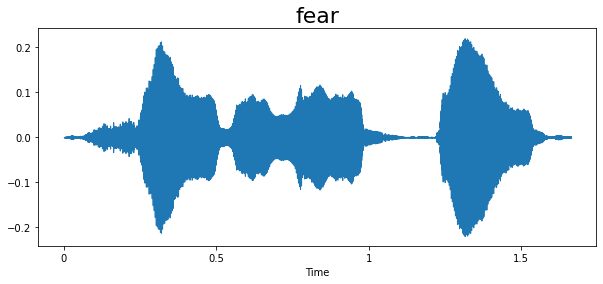

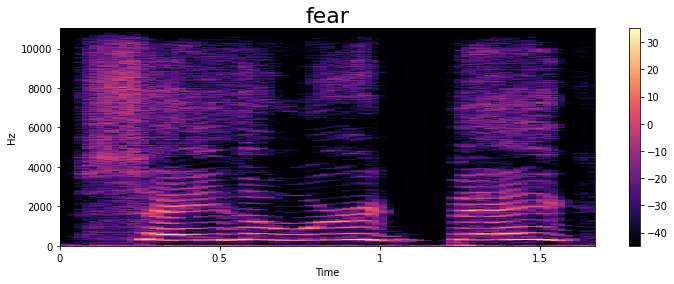

In [50]:
emotion = "fear"
path = np.array(data['speech'][data['label']==emotion])[5]
# print(path)
datas, sampling_rate = librosa.load(path)
waveplot(datas, sampling_rate, emotion)
spectogram(datas, sampling_rate, emotion)
Audio(path)

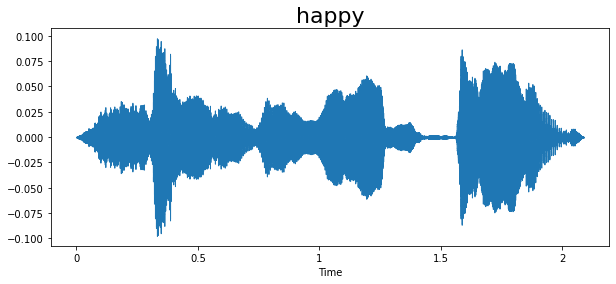

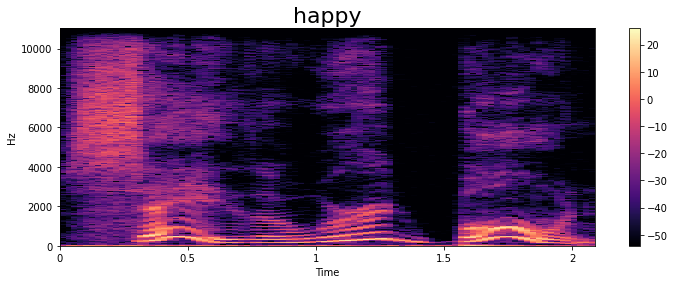

In [51]:
emotion = "happy"
path = np.array(data['speech'][data['label']==emotion])[8]
# print(path)
datas, sampling_rate = librosa.load(path)
waveplot(datas, sampling_rate, emotion)
spectogram(datas, sampling_rate, emotion)
Audio(path)

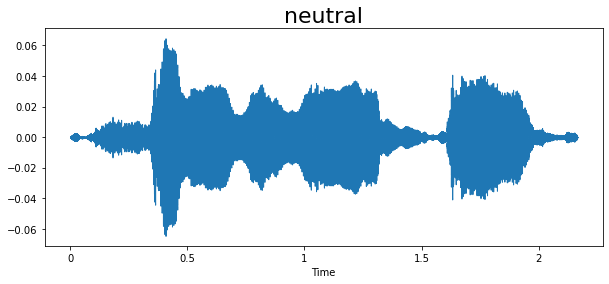

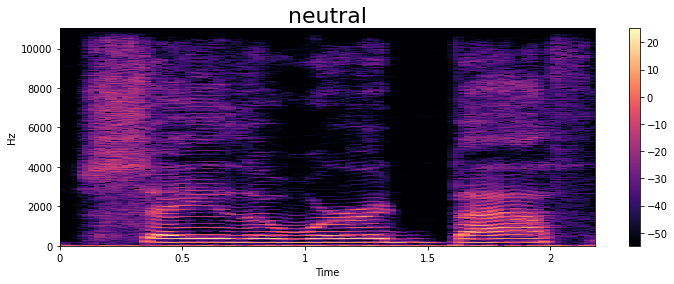

In [52]:
emotion = "neutral"
path = np.array(data['speech'][data['label']==emotion])[3]
# print(path)
datas, sampling_rate = librosa.load(path)
waveplot(datas, sampling_rate, emotion)
spectogram(datas, sampling_rate, emotion)
Audio(path)

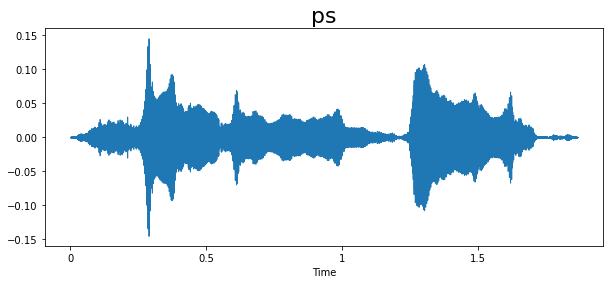

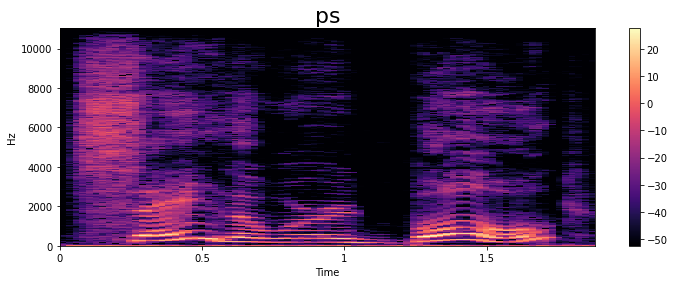

In [53]:
emotion = "ps"
path = np.array(data['speech'][data['label']==emotion])[7]
# print(path)
datas, sampling_rate = librosa.load(path)
waveplot(datas, sampling_rate, emotion)
spectogram(datas, sampling_rate, emotion)
Audio(path)

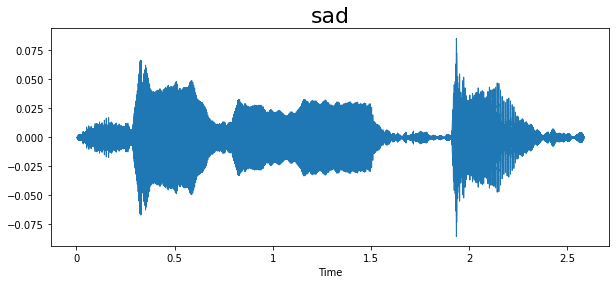

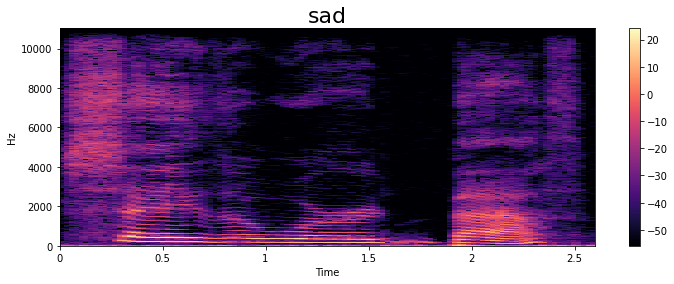

In [54]:
emotion = "sad"
path = np.array(data['speech'][data['label']==emotion])[3]
# print(path)
datas, sampling_rate = librosa.load(path)
waveplot(datas, sampling_rate, emotion)
spectogram(datas, sampling_rate, emotion)
Audio(path)

Now it's time for feature extraction

## Feature Extraction

In [55]:
def Extract_MFCC(filename):
    y, sr = librosa.load(filename, duration=4, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr= sr, n_mfcc=40).T, axis=0)
    return mfcc

**MFCC** stands for Mel-Frequency Cepstral Coefficients

In [56]:
Extract_MFCC(data['speech'][0])

array([-3.9660400e+02,  7.8255554e+01, -1.9569336e+01, -2.1489853e+01,
       -2.5253003e+00,  1.0445654e+01, -2.1044716e+01, -5.8948498e+00,
       -7.4592476e+00, -5.2469349e-01, -2.1899045e+00,  5.1469666e-01,
        5.5106127e-01,  1.1669704e+00,  2.6338916e+00,  3.3791060e+00,
       -4.8432765e+00, -4.3863826e+00, -1.8235220e+00, -1.0080047e+01,
       -7.6946745e+00, -1.4722964e+00, -7.2105827e+00,  9.8874454e+00,
        8.1233616e+00,  2.1820000e+01,  1.9096575e+01,  2.0362583e+01,
        1.2816751e+01,  8.4005699e+00,  2.0429327e-01,  5.1074343e+00,
        9.3775549e+00,  5.3786016e+00,  2.4897270e+00, -1.6286913e+00,
        4.7148490e+00,  9.0847254e+00,  2.0382307e+00, -1.8096156e+00],
      dtype=float32)

In [57]:
X_mfcc = data['speech'].apply(lambda x:Extract_MFCC(x))

In [58]:
X_mfcc

0       [-396.604, 78.255554, -19.569336, -21.489853, ...
1       [-491.92722, 120.23254, 9.670667, -7.0598693, ...
2       [-447.49503, 91.5542, -0.39023075, -17.291502,...
3       [-494.20566, 108.41832, 12.990735, -13.772039,...
4       [-532.54865, 108.74479, 13.694969, -4.846499, ...
                              ...                        
2795    [-348.2334, 35.60242, -4.365128, 15.534868, 6....
2796    [-346.21262, 37.196987, -12.763891, 36.840496,...
2797    [-420.88638, 80.78, 5.5122027, 33.144695, 1.98...
2798    [-373.98077, 61.24116, -4.412523, 14.75044, -1...
2799    [-422.2284, 71.489845, 31.928364, 46.721912, 4...
Name: speech, Length: 2800, dtype: object

In [59]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [60]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

**(2800, 40, 1)** - The first dimensions is the length of the dataset, the 2nd one is the column length, the 3rd dimension is 1

In [61]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(data[['label']])

In [62]:
y = y.toarray()

In [63]:
y.shape

(2800, 7)

### Creating The LSTM model

In [64]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# gpu_devices = tf.config.experimental.list_physical_devices("GPU")
# if len(physical_devices) > 0:
#         tf.config.experimental.set_memory_growth(physical_devices[0], True)
        
# for device in gpu_devices:
#     tf.config.experimental.set_memory_growth(device, True)

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])


# model = Sequential([
#     LSTM(123, return_sequences=False, input_shape=(40,1)),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dropout(0.2),
#     Dense(7, activation='softmax')
# ])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                

### Train The model

In [65]:
trained = model.fit(X, y, validation_split=0.2, epochs=50, batch_size= 64)

Epoch 1/50
35/35 [==============================] - 2s 22ms/step - loss: 1.5523 - accuracy: 0.3621 - val_loss: 0.7436 - val_accuracy: 0.7179
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6865 - accuracy: 0.7174 - val_loss: 0.3709 - val_accuracy: 0.8482
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 0.3332 - accuracy: 0.8850 - val_loss: 0.2110 - val_accuracy: 0.9429
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 0.2278 - accuracy: 0.9302 - val_loss: 0.1190 - val_accuracy: 0.9732
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1965 - accuracy: 0.9333 - val_loss: 0.1054 - val_accuracy: 0.9625
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1211 - accuracy: 0.9580 - val_loss: 0.1589 - val_accuracy: 0.9643
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1182 - accuracy: 0.9636 - val_loss: 0.1225 - val_accuracy: 0.9679
Epoch 8/50
35/35 [=

## Plot The Result

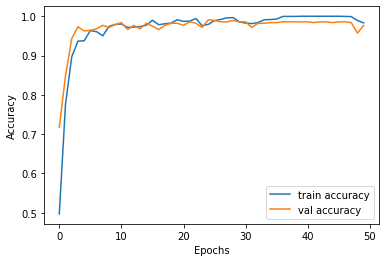

In [66]:
epochs = list(range(50))
acc = trained.history['accuracy']
val_acc = trained.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

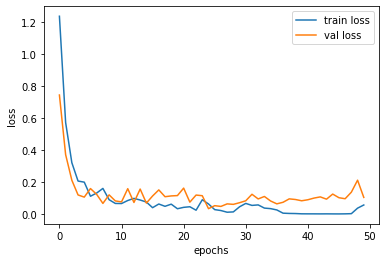

In [67]:
loss = trained.history['loss']
val_loss = trained.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()